Desafio 25: Análise de Dados Meteorológicos com Tratamento

📂 Dataset: Registros mensais de temperatura e precipitação em diferentes cidades brasileiras.
Colunas: Cidade, Mês, Temperatura_Média_C, Precipitação_mm

🎯 Tarefas:

    Converta as colunas Temperatura_Média_C e Precipitação_mm para numérico, tratando valores inválidos como "", "N/A" e NaN.

    Identifique e conte os valores ausentes em cada coluna.

    Calcule a temperatura média anual por cidade (após tratamento).

    Gere um gráfico de barras mostrando a média de precipitação por cidade.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("dia_25_dados_meteorologicos.csv")
df.head()

,Cidade,Mês,Temperatura_Média_C,Precipitação_mm
0,Belo Horizonte,Set,22.5,115.2
1,Salvador,Set,16.8,84.8
2,São Paulo,Set,16.6,148.5
3,Porto Alegre,Mar,30.6,87.9
4,Porto Alegre,Nov,24.1,197.0


In [16]:
#Converta as colunas Temperatura_Média_C e Precipitação_mm para numérico, tratando valores inválidos como "", "N/A" e NaN.
df["Temperatura_Média_C"] = pd.to_numeric(df["Temperatura_Média_C"], errors="coerce")
df["Precipitação_mm"] = pd.to_numeric(df["Precipitação_mm"], errors="coerce")

df["Temperatura_Média_C"] = df["Temperatura_Média_C"].fillna(
    df.groupby(["Cidade", "Mês"])["Temperatura_Média_C"].transform("mean")
)

df["Precipitação_mm"] = df["Precipitação_mm"].fillna(
    df.groupby(["Cidade", "Mês"])["Precipitação_mm"].transform("mean")
)

In [17]:
#Identifique e conte os valores ausentes em cada coluna.
df.isnull().sum()

Cidade                 0
Mês                    0
Temperatura_Média_C    0
Precipitação_mm        0
dtype: int64

In [25]:
#Calcule a temperatura média anual por cidade (após tratamento).
tempMediaCidade = df.groupby("Cidade")["Temperatura_Média_C"].mean().round(1)
print(tempMediaCidade.apply(lambda x: f"{x} ºC").to_string())

Cidade
Belo Horizonte    23.2 ºC
Porto Alegre      24.5 ºC
Rio de Janeiro    23.0 ºC
Salvador          26.2 ºC
São Paulo         25.2 ºC


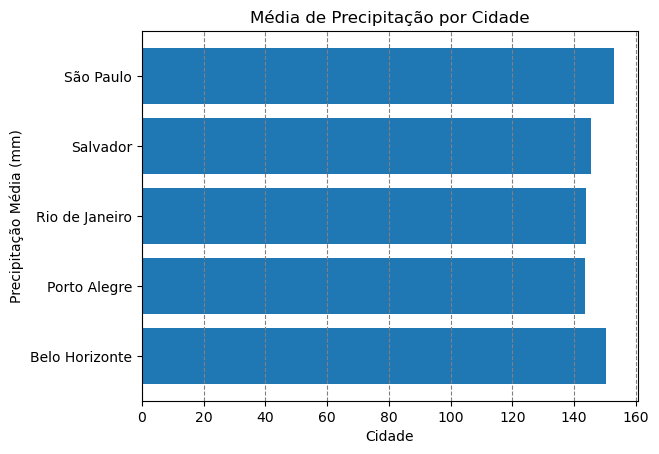

In [46]:
#Gere um gráfico de barras mostrando a média de precipitação por cidade.
precipitacaoCidadeMedia = df.groupby("Cidade")["Precipitação_mm"].mean()
plt.barh(precipitacaoCidadeMedia.index, precipitacaoCidadeMedia.values)
plt.title("Média de Precipitação por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Precipitação Média (mm)")
plt.grid(color="grey", linestyle="--", axis="x")
plt.show()